Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'></center>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = +1 = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = -1 = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

In [2]:
def demo_sigmoid():
    def sigmoid(z):
        return 1./(1. + np.exp(-z))

    z = np.linspace(-10, 10, 100)

    y = sigmoid(z)
    plt.plot(z, y)
    plt.xlabel('$z$')
    plt.ylabel('$\sigma(z)$')
    
    plt.show()

Перед тем как мы пойдем дальше, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. 

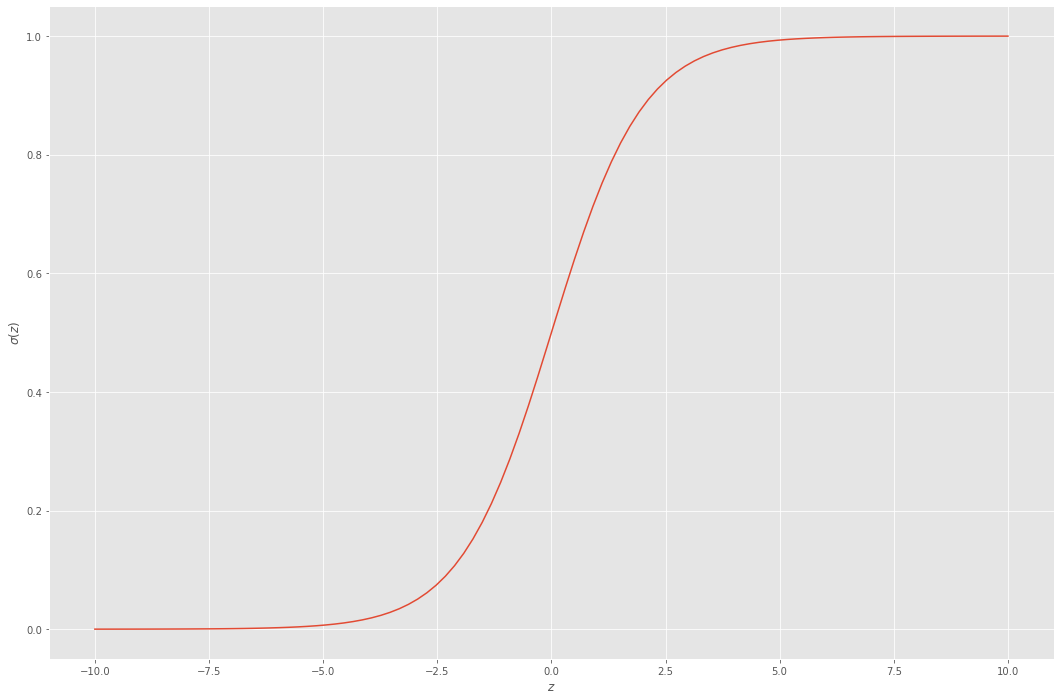

In [3]:
demo_sigmoid()

<center><img src='img/prob.png'></center>

#### Постановка задачи
Будем требовать, чтобы алгоритм возвращал вероятность класса $y=+1$:
$$h(x,w) = p(y=+1|x,w) = \sigma(g(x))$$

Выпишем функцию правдоподобия
$$ \mathcal{L}(w) = \prod_i^n h(x^{(i)},w)^{[y^{(i)} = +1]} (1 - h(x^{(i)},w))^{[y^{(i)} = -1]} \rightarrow \max_w$$
$$ -\log{\mathcal{L}(w)} = - \sum_i^n [y^{(i)} = +1]\cdot\log{(h(x^{(i)},w))} + {[y^{(i)} = -1]}\cdot\log{(1-h(x^{(i)},w))} \rightarrow \min_w$$
$$L(w) = \log{\mathcal{L}(w)} \rightarrow \min_w $$

In [4]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

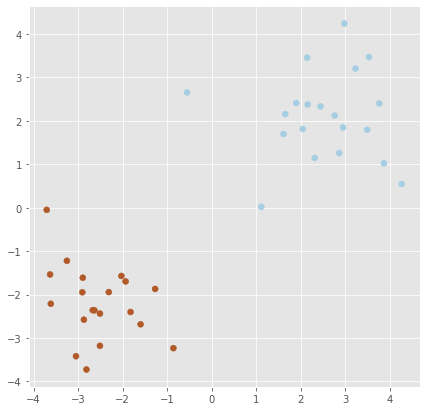

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [6]:
from sklearn.linear_model import LogisticRegression

Обучите логистическую регрессию на этих данных и нарисуйте разделяющую гиперплоскость

In [7]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression()

In [8]:
print 'w_0 = %f' % model.intercept_
print 'w_1, w_2 = ', model.coef_

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('w_0 = %f' % model.intercept_)? (<ipython-input-8-daa547e58ca9>, line 1)

In [9]:
# Нарисуем эту гиперплоскость
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

x_1 = np.linspace(-4, 4, 10)
x_2 = - (w_0 + w_1*x_1)/w_2

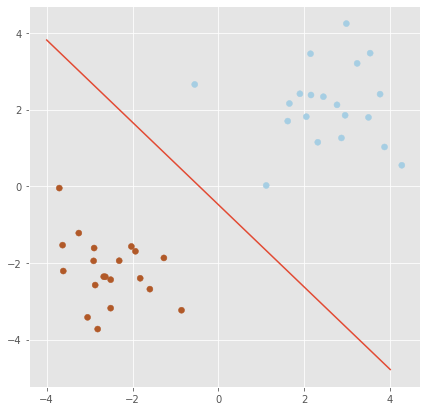

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
plt.plot(x_1, x_2)

In [11]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [12]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[9.99050554e-01, 9.49446061e-04],
       [9.99651088e-01, 3.48912184e-04],
       [9.96620832e-01, 3.37916830e-03],
       [9.96035615e-01, 3.96438502e-03],
       [9.92997116e-01, 7.00288369e-03],
       [9.98110520e-01, 1.88948007e-03],
       [9.96303654e-01, 3.69634563e-03],
       [9.95795688e-01, 4.20431229e-03],
       [9.97669523e-01, 2.33047663e-03],
       [9.84221441e-01, 1.57785592e-02]])

In [13]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.95868194, -7.96034132, -5.68674078, -5.52643227, -4.95440574,
       -6.26956232, -5.59670742, -5.46743137, -6.05934928, -4.1331989 ])

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [14]:
from sklearn.datasets import make_circles

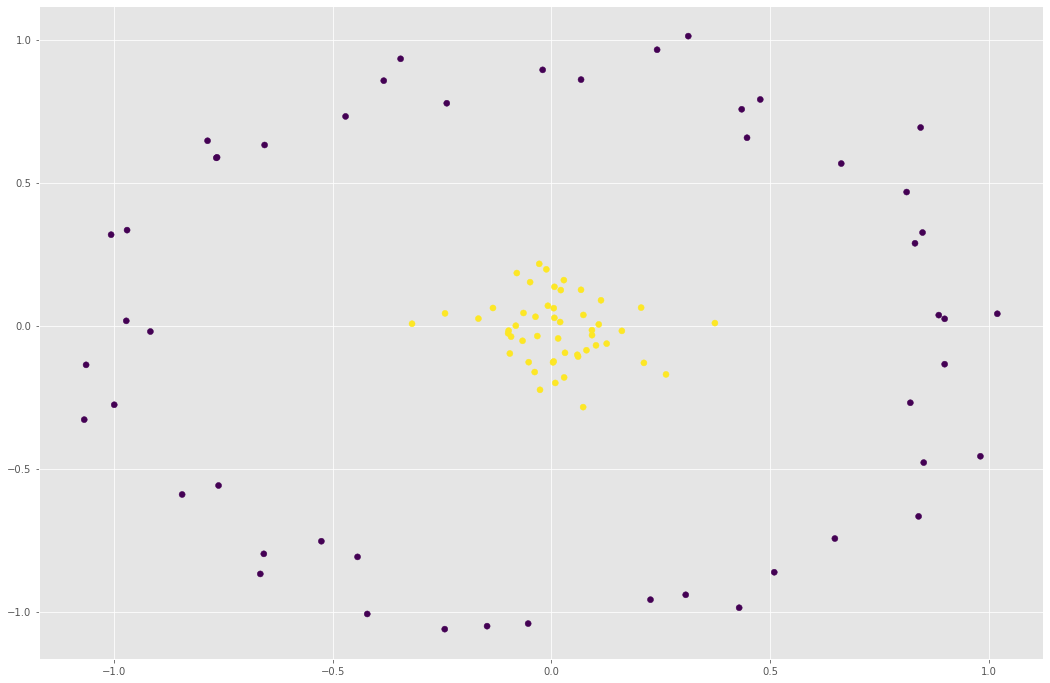

In [15]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$, $x^2_2$ и обучите логистическую регрессию

In [16]:
X_new = np.c_[X[:,0], X[:,1], X[:,0]**2, X[:,1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000)

In [17]:
# Посчитаем количество ошибок
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

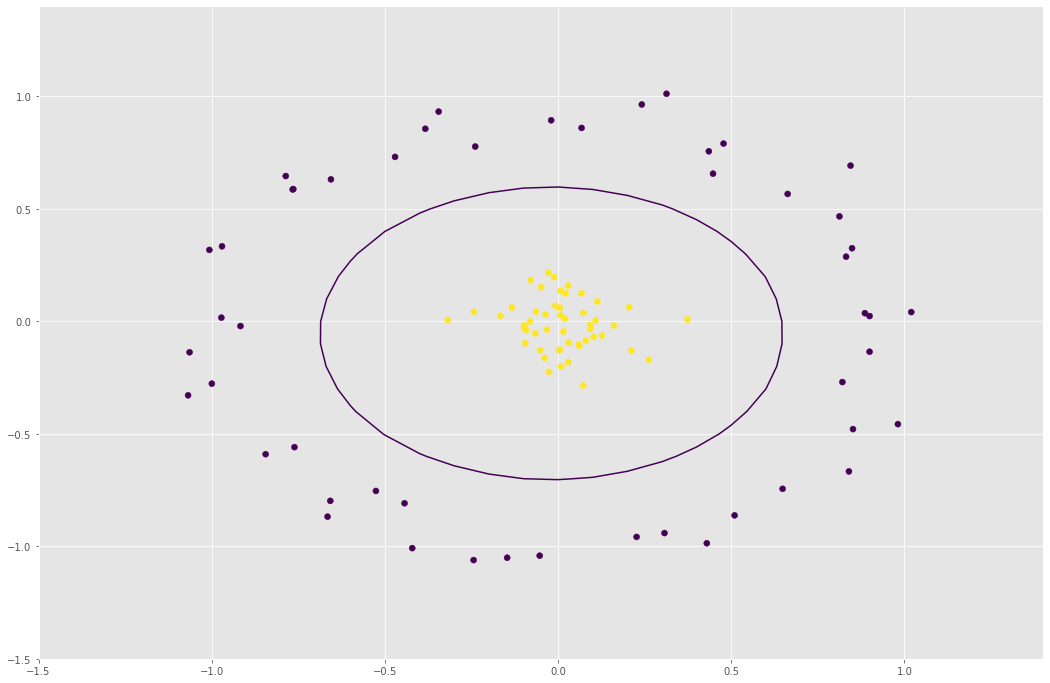

In [18]:
# Нарисуем полученную окружность

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2, xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)